**Motivation:**
Applying basic concepts of SQL on European Soccer Database to perform data analysis. 

**Importing Libraries**

In [1]:
import os
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt

**Connecting to the Database**

In [2]:
cwd= os.getcwd()
cwd

'C:\\Users\\ameyasgandhe\\Desktop\\Data Analytics Projects\\Data Analysis of European  Soccer Database'

In [3]:
path = 'C:\\Users\\ameyasgandhe\\Desktop\\Data Analytics Projects\\Data Analysis of European  Soccer Database'

In [4]:
connection = sqlite3.connect('C:\\Users\\ameyasgandhe\\Desktop\\Data Analytics Projects\\Data Analysis of European  Soccer Database\\database.sqlite') 
cursor = connection.cursor()

In [5]:
tables = pd.read_sql("""SELECT *
FROM sqlite_master
WHERE type='table';""", connection)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


**List of Countries**

In [6]:
query = "SELECT * FROM Country;"

countries = pd.read_sql_query(query, connection)
display(countries)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


**List of leagues and their country**

In [7]:
# SQL query to join Country and League tables
query = """
SELECT League.name AS League, Country.name AS Country
FROM League
JOIN Country ON Country.id = League.country_id;
"""

# Execute the query and load the data into a pandas DataFrame
leagues_and_countries = pd.read_sql_query(query, connection)

# Display the DataFrame
display(leagues_and_countries)

,League,Country
0,Belgium Jupiler League,Belgium
1,England Premier League,England
2,France Ligue 1,France
3,Germany 1. Bundesliga,Germany
4,Italy Serie A,Italy
5,Netherlands Eredivisie,Netherlands
6,Poland Ekstraklasa,Poland
7,Portugal Liga ZON Sagres,Portugal
8,Scotland Premier League,Scotland
9,Spain LIGA BBVA,Spain


**Note :**  

Here we used JOIN to keep only records that match the condition in both the tables, and records in both tables that do not match wouldn't appear in the output

**List of Teams:**

In [8]:
# SQL query to select teams from Teams table, order by team_long_name and limit to 10
query = """
SELECT *
FROM Team
ORDER BY team_long_name
LIMIT 10;
"""

# Execute the query and load the data into a pandas DataFrame
teams = pd.read_sql_query(query, connection)

# Display the DataFrame
display(teams)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


**List of Matches:**

In [13]:
# Query to get country IDs for 'Germany'
country_query = "SELECT id FROM Country WHERE name = 'Germany';"
country_id = pd.read_sql_query(country_query, connection).iloc[0, 0]

# Query to get Match details for 'Spain'
match_query = f"""
SELECT id, country_id, league_id, season, stage, date, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal
FROM Match
WHERE country_id = {country_id}
ORDER BY date
LIMIT 10;
"""
matches = pd.read_sql_query(match_query, connection)

In [14]:
# Query to get League names
league_query = "SELECT id, name FROM League;"
leagues = pd.read_sql_query(league_query, connection)

# Query to get Team names
team_query = "SELECT team_api_id, team_long_name FROM Team;"
teams = pd.read_sql_query(team_query, connection)

# Merging matches with League and Team names
matches = matches.merge(leagues, left_on='league_id', right_on='id', how='left')
matches = matches.rename(columns={'name': 'league_name'}).drop('league_id', axis=1)

matches = matches.merge(teams, left_on='home_team_api_id', right_on='team_api_id', how='left')
matches = matches.rename(columns={'team_long_name': 'home_team'}).drop(['home_team_api_id', 'team_api_id'], axis=1)

matches = matches.merge(teams, left_on='away_team_api_id', right_on='team_api_id', how='left')
matches = matches.rename(columns={'team_long_name': 'away_team'}).drop(['away_team_api_id', 'team_api_id'], axis=1)

In [17]:
# Adding country name as a constant column (since all matches are from Spain)
matches['country_name'] = 'Germany'

# Reordering columns to match the original format
detailed_matches = matches[[ 'country_name', 'league_name', 'season', 'stage', 'date', 'home_team', 'away_team', 'home_team_goal', 'away_team_goal']]

# Display the DataFrame
display(detailed_matches)

,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-15 00:00:00,FC Bayern Munich,Hamburger SV,2,2
1,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-16 00:00:00,Bayer 04 Leverkusen,Borussia Dortmund,2,3
2,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-16 00:00:00,FC Schalke 04,Hannover 96,3,0
3,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-16 00:00:00,VfL Wolfsburg,1. FC Köln,2,1
4,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-16 00:00:00,DSC Arminia Bielefeld,SV Werder Bremen,2,2
5,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-16 00:00:00,FC Energie Cottbus,TSG 1899 Hoffenheim,0,3
6,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-16 00:00:00,Karlsruher SC,VfL Bochum,1,0
7,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-17 00:00:00,Eintracht Frankfurt,Hertha BSC Berlin,0,2
8,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-17 00:00:00,Borussia Mönchengladbach,VfB Stuttgart,1,3
9,Germany,Germany 1. Bundesliga,2008/2009,2,2008-08-22 00:00:00,Hannover 96,FC Energie Cottbus,0,0


**Leagues by Seasons :**

In [21]:
# Retrieve relevant data from the database
query_matches = """
SELECT country_id, league_id, season, stage, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal
FROM Match;
"""
matches = pd.read_sql_query(query_matches, connection)

query_countries = "SELECT id, name FROM Country WHERE name IN ('Spain', 'Germany', 'France', 'Italy', 'England');"
countries = pd.read_sql_query(query_countries, connection)

query_leagues = "SELECT id, name FROM League;"
leagues = pd.read_sql_query(query_leagues, connection)

query_teams = "SELECT team_api_id, team_long_name FROM Team;"
teams = pd.read_sql_query(query_teams, connection)

In [22]:
# Merging data
matches = matches.merge(countries, left_on='country_id', right_on='id').drop('id', axis=1)
matches = matches.merge(leagues, left_on='league_id', right_on='id').drop('id', axis=1)
matches = matches.merge(teams, left_on='home_team_api_id', right_on='team_api_id').drop('team_api_id', axis=1)

# Aggregating data
aggregated_data = matches.groupby(['name_x', 'name_y', 'season']).agg(
    number_of_stages=pd.NamedAgg(column='stage', aggfunc=lambda x: x.nunique()),
    number_of_teams=pd.NamedAgg(column='team_long_name', aggfunc=lambda x: x.nunique()),
    avg_home_team_scores=pd.NamedAgg(column='home_team_goal', aggfunc='mean'),
    avg_away_team_goals=pd.NamedAgg(column='away_team_goal', aggfunc='mean'),
    avg_goal_diff=pd.NamedAgg(column='home_team_goal', aggfunc=lambda x: (x - matches['away_team_goal']).mean()),
    avg_goals=pd.NamedAgg(column='home_team_goal', aggfunc=lambda x: (x + matches['away_team_goal']).mean()),
    total_goals=pd.NamedAgg(column='home_team_goal', aggfunc=lambda x: (x + matches['away_team_goal']).sum())
)

In [23]:
# Filtering out seasons with fewer than 10 stages
leagues_by_season = aggregated_data[aggregated_data['number_of_stages'] > 10]

# Renaming columns for clarity
leagues_by_season.reset_index(inplace=True)
leagues_by_season.rename(columns={'name_x': 'country_name', 'name_y': 'league_name'}, inplace=True)

In [24]:
# Sorting
leagues_by_season.sort_values(by=['country_name', 'league_name', 'season'], ascending=[True, True, False], inplace=True)

# Display the DataFrame
display(leagues_by_season)

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scores,avg_away_team_goals,avg_goal_diff,avg_goals,total_goals
7,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026.0
6,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975.0
5,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052.0
4,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063.0
3,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066.0
2,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063.0
1,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053.0
0,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942.0
15,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960.0
14,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947.0


In [25]:
import matplotlib.pyplot as plt

# Calculating additional metrics
leagues_by_season['avg_goals_per_game'] = leagues_by_season['total_goals'] / (leagues_by_season['number_of_stages'] * leagues_by_season['number_of_teams'])
leagues_by_season['avg_goal_diff'] = leagues_by_season['avg_goal_diff']

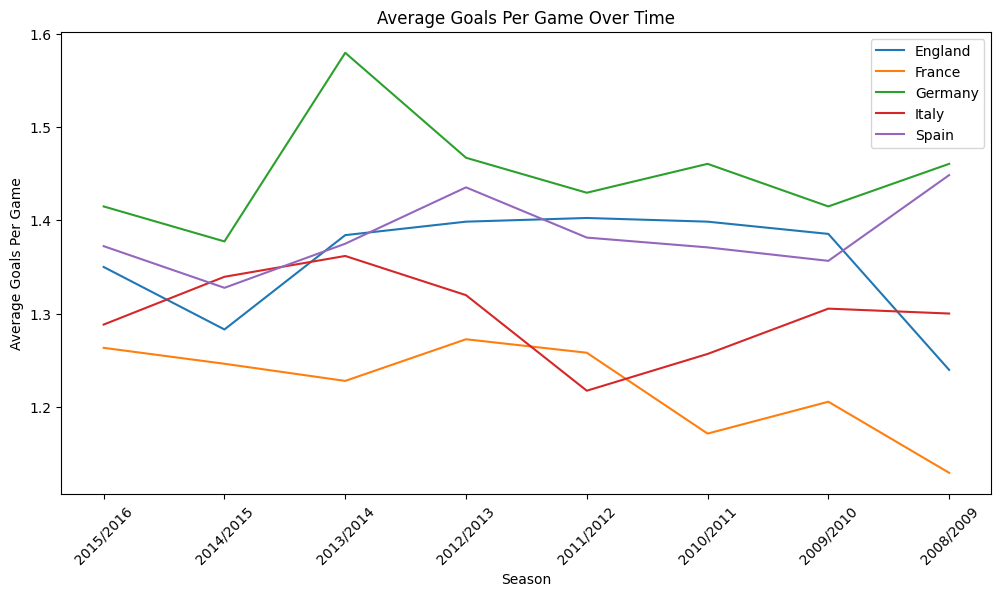

In [26]:
# 1. Average goals per game over time
plt.figure(figsize=(12, 6))
for country in leagues_by_season['country_name'].unique():
    country_data = leagues_by_season[leagues_by_season['country_name'] == country]
    plt.plot(country_data['season'], country_data['avg_goals_per_game'], label=country)

plt.xlabel('Season')
plt.ylabel('Average Goals Per Game')
plt.title('Average Goals Per Game Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

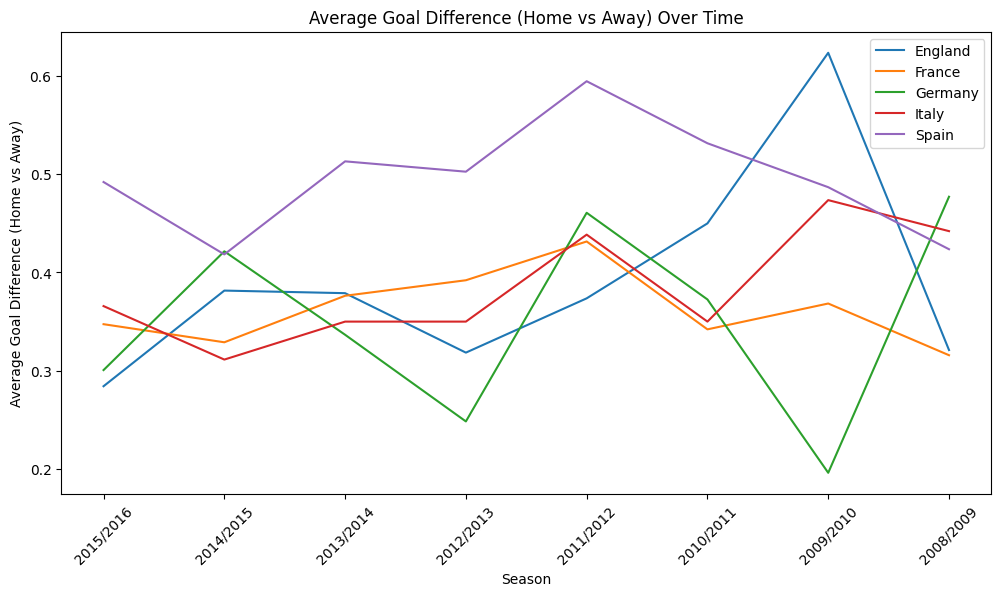

In [27]:
# 2. Average goals difference home vs out
plt.figure(figsize=(12, 6))
for country in leagues_by_season['country_name'].unique():
    country_data = leagues_by_season[leagues_by_season['country_name'] == country]
    plt.plot(country_data['season'], country_data['avg_goal_diff'], label=country)

plt.xlabel('Season')
plt.ylabel('Average Goal Difference (Home vs Away)')
plt.title('Average Goal Difference (Home vs Away) Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Player Height and Weight:**

In [33]:
query = "SELECT * FROM Player;"

player = pd.read_sql_query(query, connection)
display(player)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [34]:
query = "SELECT * FROM Player_Attributes;"

play_att = pd.read_sql_query(query, connection)
display(play_att)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [38]:
# Retrieve player data including player_api_id, height, and weight
player_query = """
SELECT player_api_id, height, weight
FROM Player;
"""
players = pd.read_sql_query(player_query, connection)

# Calculating rounded height
players['calc_height'] = players['height'].round()
players['calc_height'] = players['calc_height'].apply(lambda x: 165 if x < 165 else (195 if x > 195 else x))

In [39]:
# Retrieve player attributes data
attributes_query = """
SELECT player_api_id, avg(overall_rating) AS avg_overall_rating, avg(potential) AS avg_potential
FROM Player_Attributes
GROUP BY player_api_id;
"""
attributes = pd.read_sql_query(attributes_query, connection)

# Merge players with their attributes
merged_data = players.merge(attributes, on='player_api_id', how='left')

In [40]:
# Group by calculated height and aggregate
grouped_players = merged_data.groupby('calc_height').agg(
    distribution=('calc_height', 'count'),
    avg_overall_rating=('avg_overall_rating', 'mean'),
    avg_potential=('avg_potential', 'mean'),
    avg_weight=('weight', 'mean')
).reset_index()

# Display the DataFrame
display(grouped_players)

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161
